<a href="https://colab.research.google.com/github/aunghlaingtun/iti107ai/blob/main/yolodatasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Annotated Dataset
To save you time for this lab, you can download a pre-annotated balloon dataset here.

We download and unzip to the directory called datasets

In [ ]:
%%capture
%%bash
wget https://github.com/nyp-sit/iti107-2024S2/raw/refs/heads/main/data/balloon_annotated_dataset.zip
mkdir -p datasets
unzip balloon_annotated_dataset.zip -d datasets/

In [1]:
%%capture
%%bash
wget https://github.com/aunghlaingtun/iti107ai/raw/main/yolodatasets.zip
mkdir -p datasets
unzip yolodatasets.zip -d datasets

dfds

In [2]:
%%capture
!pip install ultralytics
!pip install comet_ml

## Training the Model

YOLOv8 comes with different sizes of pretrained models: yolov8n, yolov8s, .... They differs in terms of their sizes, inference speeds and mean average precision:

<img src="https://github.com/nyp-sit/iti107-2024S2/blob/main/assets/yolo-models.png?raw=true" width="70%"/>


We will use the small pretrained model yolo8s and finetune it on our custom dataset.

**Selected yolov8m that for pre-trained yolo model to used**.

# Setup the logging
Ultralytics support logging to wandb, comet.ml and tensorboard, out of the box. Here we only enable wandb.

You need to create an account at wandb and get the API key from https://wandb.ai/authorize.

In [3]:
from ultralytics import settings

settings.update({"wandb": True,
                 "comet.ml": False,
                 "tensorboard": False})

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# Training
We specify the path to data.yaml file, and train with a batch size of 15, and we also save the checkpoint at each epoch (save_period=1). We assume here you are connected to a GPU, hence we can specify the device to use as device=0 to select the first GPU. We specify the project name as balloon, this will create a folder called balloon to store the weights and various training artifacts such as F1, PR curves, confusion matrics, training results (loss, mAP, etc).

For a complete listing of train settings, you can see here.

You can also specify the type of data augmentation you want as part of the train pipeline.

You can monitor your training progress at wandb (the link is given in the train output below)

In [4]:
!ls -la datasets/valid/images | wc -l

11


In [12]:
from ultralytics import YOLO
from ultralytics import settings

model = YOLO("yolov8m.pt")  # Load a pre-trained YOLO model
result = model.train(data="datasets/data.yaml",
                     epochs=50,
                     save_period=3,
                     batch=16,

                     workers=4,
                     patience=10,

                     device=0,
                     project='yolodatasets',
                     plots=True)

Ultralytics 8.3.52 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=datasets/data.yaml, epochs=50, time=None, patience=10, batch=16, imgsz=640, save=True, save_period=3, cache=False, device=0, workers=4, project=yolodatasets, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

wandb: Currently logged in as: aunghlaingtun (aunghlaingtun-nanyang-polytechnic). Use `wandb login --relogin` to force relogin


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...
AMP: checks passed ✅


train: Scanning /content/datasets/train/labels.cache... 29 images, 0 backgrounds, 0 corrupt: 100%|██████████| 29/29 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/valid/labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8/8 [00:00<?, ?it/s]


Plotting labels to yolodatasets/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to yolodatasets/train2
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      7.15G       2.63      5.149      2.182         51        640: 100%|██████████| 2/2 [00:01<00:00,  1.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.40it/s]

                   all          8         41     0.0189     0.0147    0.00598    0.00154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      6.53G      2.431      4.929        2.2         56        640: 100%|██████████| 2/2 [00:01<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.86it/s]

                   all          8         41     0.0107     0.0147    0.00502    0.00148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      6.55G      2.344      5.306      2.046         36        640: 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.69it/s]

                   all          8         41    0.00885     0.0147    0.00562    0.00176



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      6.52G      2.316      4.825      2.253         39        640: 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.02it/s]


                   all          8         41     0.0087     0.0294    0.00796    0.00206

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50       6.8G      2.291       3.58      2.032         45        640: 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.84it/s]


                   all          8         41       0.65       0.25      0.103     0.0335

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      6.74G      2.019      2.793      1.722         72        640: 100%|██████████| 2/2 [00:01<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.94it/s]


                   all          8         41      0.743      0.248      0.297     0.0968

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      6.82G      1.935      2.451      1.676         47        640: 100%|██████████| 2/2 [00:01<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.64it/s]

                   all          8         41      0.777      0.235      0.289      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      6.74G       1.72      2.397      1.607         49        640: 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.83it/s]

                   all          8         41      0.262      0.376      0.224     0.0862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      6.83G      1.742       2.37      1.505         64        640: 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.48it/s]

                   all          8         41      0.338      0.435      0.287      0.108



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      6.85G      1.676      2.519      1.651         45        640: 100%|██████████| 2/2 [00:00<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.25it/s]

                   all          8         41      0.247      0.446      0.239      0.107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      6.92G      1.617       1.74      1.418         62        640: 100%|██████████| 2/2 [00:00<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.34it/s]


                   all          8         41      0.252      0.299      0.266      0.123

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      6.84G      1.601      1.939      1.546         51        640: 100%|██████████| 2/2 [00:00<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.41it/s]

                   all          8         41      0.421      0.544      0.436      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      6.88G      1.652      1.553      1.401         69        640: 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.40it/s]

                   all          8         41      0.564      0.582       0.55      0.185



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      6.87G      1.784      1.595      1.489         72        640: 100%|██████████| 2/2 [00:01<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.87it/s]

                   all          8         41      0.652      0.466      0.433      0.177



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      6.86G      1.586      1.563      1.392         75        640: 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.97it/s]


                   all          8         41      0.454      0.494      0.379      0.144

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.86G      1.478      1.594      1.383         41        640: 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.12it/s]


                   all          8         41      0.546      0.472      0.389      0.137

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.85G        1.6      1.481      1.369         90        640: 100%|██████████| 2/2 [00:01<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.28it/s]

                   all          8         41      0.602      0.321      0.368      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      6.87G      1.409      1.411      1.343         42        640: 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.03it/s]

                   all          8         41      0.592      0.407      0.382      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.87G      1.478      1.303      1.372         68        640: 100%|██████████| 2/2 [00:01<00:00,  1.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.07it/s]

                   all          8         41      0.563      0.439      0.407       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.87G      1.532      1.447      1.459         47        640: 100%|██████████| 2/2 [00:00<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.90it/s]

                   all          8         41        0.5       0.45       0.39      0.175



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      6.88G      1.399      1.294       1.24         75        640: 100%|██████████| 2/2 [00:01<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.12it/s]

                   all          8         41      0.827      0.265      0.288      0.144



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      6.88G      1.477      1.398      1.324         57        640: 100%|██████████| 2/2 [00:01<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]

                   all          8         41      0.328      0.466      0.287      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      6.86G      1.454      1.418      1.301         61        640: 100%|██████████| 2/2 [00:01<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.02it/s]

                   all          8         41      0.702      0.422      0.493       0.19
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 13, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



23 epochs completed in 0.053 hours.
Optimizer stripped from yolodatasets/train2/weights/last.pt, 52.0MB
Optimizer stripped from yolodatasets/train2/weights/best.pt, 52.0MB

Validating yolodatasets/train2/weights/best.pt...
Ultralytics 8.3.52 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.34it/s]


                   all          8         41      0.562      0.582       0.55      0.186
             face_mask          6         34       0.47      0.735      0.656      0.301
                 shark          2          7      0.655      0.429      0.445     0.0703
Speed: 0.9ms preprocess, 10.0ms inference, 0.0ms loss, 4.6ms postprocess per image
Results saved to yolodatasets/train2


lr/pg0,▁▂▂▃▃▄▄▄▅▅▆▆▆▆▇▇▇▇█████
lr/pg1,▁▂▂▃▃▄▄▄▅▅▆▆▆▆▇▇▇▇█████
lr/pg2,▁▂▂▃▃▄▄▄▅▅▆▆▆▆▇▇▇▇█████
metrics/mAP50(B),▁▁▁▁▂▅▅▄▅▄▄▇█▆▆▆▆▆▆▆▅▅█
metrics/mAP50-95(B),▁▁▁▁▂▅▅▄▅▅▆███▆▆▇▇▇█▆▆█
metrics/precision(B),▁▁▁▁▆▇█▃▄▃▃▅▆▇▅▆▆▆▆▅█▄▆
metrics/recall(B),▁▁▁▁▄▄▄▅▆▆▅██▇▇▇▅▆▆▆▄▇█
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▇▆▆▆▅▄▃▃▃▂▂▂▃▂▁▂▁▁▂▁▁▁


You can see the various graphs in your wandb dashboard, for example:

You can go to the folder balloon-->train-->weights and you will files like epoch0.pt, epoch1.pt, .... and also best.pt. The epoch0.pt, epoch1.pt are the checkpoints that are saved every period (in our case, we specify period as 1 epoch). The best.pt contains the best checkpoint.

We can run the best model (using the best checkpoint) against the validation dataset to see the overall model performance on validation set.

You should see around 0.88 for mAP50, and 0.78 for mAP50-95.

In [13]:
from ultralytics import YOLO

model = YOLO("yolodatasets/train/weights/best.pt")
validation_results = model.val(data="datasets/data.yaml", device="0")

Ultralytics 8.3.52 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


val: Scanning /content/datasets/valid/labels.cache... 8 images, 0 backgrounds, 0 corrupt: 100%|██████████| 8/8 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.92it/s]


                   all          8         41      0.581      0.529      0.587      0.301
             face_mask          6         34      0.943      0.486      0.724      0.402
                 shark          2          7      0.218      0.571       0.45        0.2
Speed: 0.3ms preprocess, 34.8ms inference, 0.0ms loss, 6.0ms postprocess per image
Results saved to runs/detect/val2


# Export and Deployment
Your model is in pytorch format (.pt). You can export the model to various format, e.g. TorchScript, ONNX, OpenVINO, TensorRT, etc. depending on your use case, and deployment platform (e.g. CPU or GPU, etc)

You can see the list of supported formats and the option they support in terms of further optimization (such as imagesize, int8, half-precision, etc) in the ultralytics site.

Ultralytics provide a utility function to benchmark your model using different supported formats automatically. You can uncomment the code in the following code cell to see the benchmark result. If you are benchmarking for CPU only, the change the device=0 to device='cpu'.

Beware: it will take quite a while to complete the benchmark

In [ ]:
# from ultralytics.utils.benchmarks import benchmark

# # Benchmark on GPU (device=0 means the 1st GPU device)
# benchmark(model="balloon/train/weights/best.pt", data="datasets/data.yaml", imgsz=640, half=False, device



```
model = YOLO("Shark/train/weights/best.pt")
exported_path = model.export(format="openvino", int8=True)
```



In [14]:
model = YOLO("yolodatasets/train/weights/best.pt")
exported_path = model.export(format="openvino", int8=True)

Ultralytics 8.3.52 🚀 Python-3.10.12 torch-2.5.1+cu121 CPU (Intel Xeon 2.00GHz)
WARNING ⚠️ INT8 export requires a missing 'data' arg for calibration. Using default 'data=coco8.yaml'.
Model summary (fused): 218 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs

PyTorch: starting from 'yolodatasets/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 6, 8400) (49.6 MB)

OpenVINO: starting export with openvino 2024.6.0-17404-4c0f47d2335-releases/2024/6...
OpenVINO: collecting INT8 calibration images from 'data=coco8.yaml'


Scanning /content/datasets/coco8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]

OpenVINO: WARNING ⚠️ >300 images recommended for INT8 calibration, found 4 images.


INFO:nncf:16 ignored nodes were found by patterns in the NNCFGraph
INFO:nncf:1 ignored nodes were found by types in the NNCFGraph
INFO:nncf:Not adding activation input quantizer for operation: 205 __module.model.22.dfl/aten::view/Reshape
INFO:nncf:Not adding activation input quantizer for operation: 206 __module.model.22/aten::sigmoid/Sigmoid
INFO:nncf:Not adding activation input quantizer for operation: 217 __module.model.22.dfl/aten::transpose/Transpose
INFO:nncf:Not adding activation input quantizer for operation: 229 __module.model.22.dfl/aten::softmax/Softmax
INFO:nncf:Not adding activation input quantizer for operation: 241 __module.model.22.dfl.conv/aten::_convolution/Convolution
INFO:nncf:Not adding activation input quantizer for operation: 251 __module.model.22.dfl/aten::view/Reshape_1
INFO:nncf:Not adding activation input quantizer for operation: 267 __module.model.22/aten::sub/Subtract
INFO:nncf:Not adding activation input quantizer for operation: 268 __module.model.22/aten:

Output()

Output()

OpenVINO: export success ✅ 69.2s, saved as 'yolodatasets/train/weights/best_int8_openvino_model/' (25.4 MB)

Export complete (72.4s)
Results saved to /content/yolodatasets/train/weights
Predict:         yolo predict task=detect model=yolodatasets/train/weights/best_int8_openvino_model imgsz=640 int8 
Validate:        yolo val task=detect model=yolodatasets/train/weights/best_int8_openvino_model imgsz=640 data=datasets/data.yaml int8 
Visualize:       https://netron.app


# Inference
Let's test our model on some sample pictures. You can optionally specify the confidence threshold (e.g. conf=0.5), and the IoU (e.g. iou=0.6) for the NMS. The model will only output the bounding boxes of those detection that exceeds the confidence threshould and the IoU threshold.

Loading yolodatasets/train/weights/best_int8_openvino_model for OpenVINO inference...
Using OpenVINO LATENCY mode for batch=1 inference...



100%|██████████| 104k/104k [00:00<00:00, 38.4MB/s]


image 1/1 /content/maskNshark.jpg: 640x640 2 face_masks, 1 shark, 492.9ms
Speed: 9.5ms preprocess, 492.9ms inference, 18.4ms postprocess per image at shape (1, 3, 640, 640)
ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'face_mask', 1: 'shark'}
obb: None
orig_img: array([[[ 50,  13,   0],
        [146,  95,  25],
        [180, 101,  10],
        ...,
        [137,  94,  31],
        [ 34,   9,   0],
        [ 12,   3,   0]],

       [[ 51,  13,   0],
        [147,  95,  25],
        [182, 101,  10],
        ...,
        [137,  94,  31],
        [ 34,   9,   0],
        [ 12,   3,   0]],

       [[ 53,  13,   0],
        [149,  95,  24],
        [184, 101,   9],
        ...,
        [137,  94,  31],
        [ 34,   9,   0],
        [ 12,   3,   0]],

       ...,

       [[ 14,   5,   0],
        [ 56,  46,  22],
        [ 60,  50,  20],
        ...,
        [ 81,  65,  22],
        [ 18,  

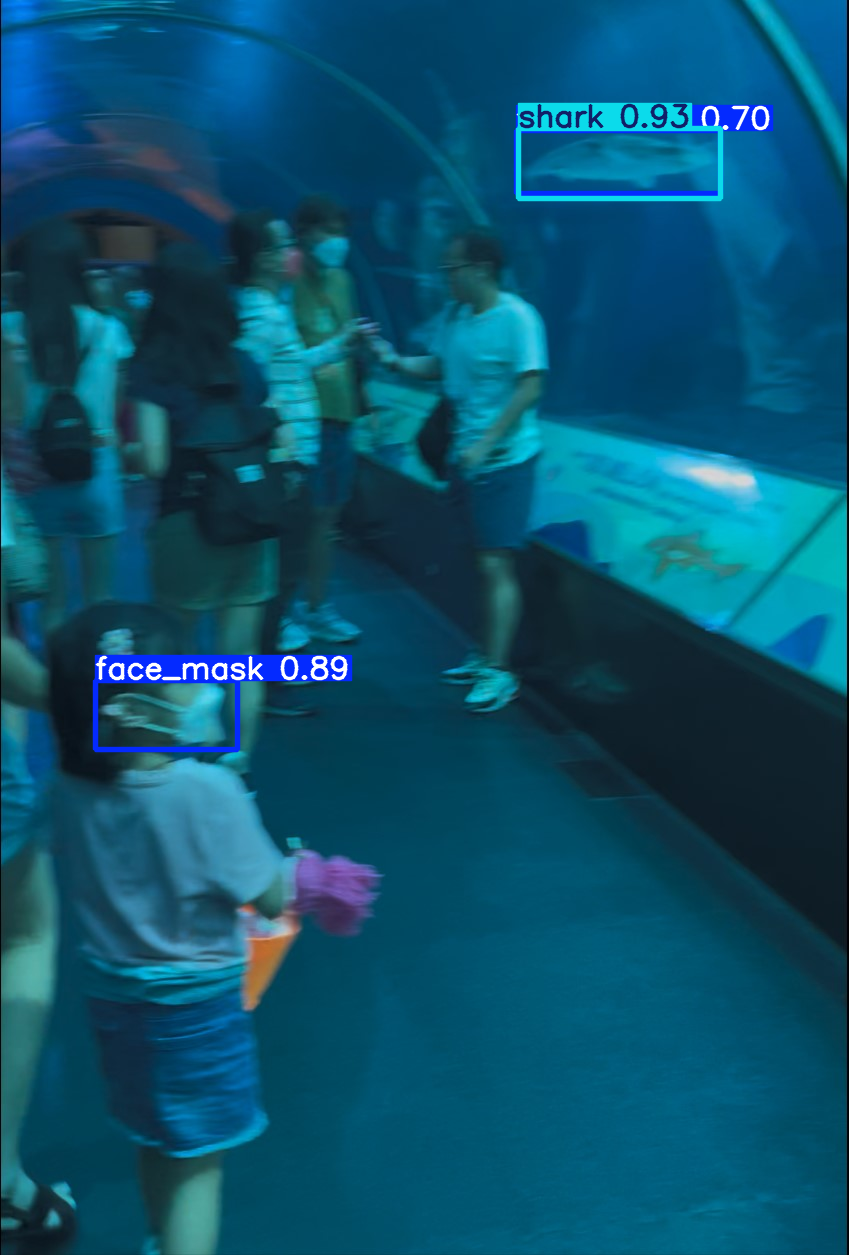

In [15]:
import ultralytics
from ultralytics import YOLO
from PIL import Image

source = 'https://github.com/aunghlaingtun/iti107ai/raw/main/sample/maskNshark.jpg'
#source = './samples/maskNshark.jpeg'
model = YOLO("yolodatasets/train/weights/best_int8_openvino_model", task='detect')
result = model(source, conf=0.5, iou=0.6)

# Visualize the results
for i, r in enumerate(result):
    print(r)
    # Plot results image
    im_bgr = r.plot()  # BGR-order numpy array
    #  im_rgb = Image.fromarray(im_bgr[..., ::-1])  # RGB-order PIL image

    # Show results to screen (in supported environments)
    r.show()

    # Save results to disk
    r.save(filename=f"results{i}.jpg")

# Download the Model
If you are training your model on Google Colab, you will download the exported OpenVINO model to a local PC. If you are training your model locally, then the exported model should already be on your local PC.

Run the following code to zip up the OpenVINO folder and download to local PC.

Note: If you encountered error message "NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968", uncomment the following cell and run it.

In [41]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [16]:
# Uncomment the following lines to fix the locale issue:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

!wget https://github.com/aunghlaingtun/iti107ai/raw/main/sample/SharkNmask.mp4

--2024-12-21 20:12:33--  https://github.com/aunghlaingtun/iti107ai/raw/main/sample/SharkNmask.mp4
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/aunghlaingtun/iti107ai/main/sample/SharkNmask.mp4 [following]
--2024-12-21 20:12:34--  https://raw.githubusercontent.com/aunghlaingtun/iti107ai/main/sample/SharkNmask.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68986922 (66M) [application/octet-stream]
Saving to: ‘SharkNmask.mp4’

SharkNmask.mp4      100%[===================>]  65.79M   206MB/s    in 0.3s    

2024-12-21 20:12:38 (206 MB/s) - ‘SharkNmask.mp4’ saved [68986922/68986922]



st


# Streaming and display video
```
from ultralytics import YOLO
import cv2

# Load the YOLO model
model = YOLO("yolodatasets/train/weights/best_int8_openvino_model", task='detect')

# Open the video file
video_path = "SharkNmask.mp4"
cap = cv2.VideoCapture(video_path)

# Loop through the video frames
while cap.isOpened():
    # Read a frame from the video
    success, frame = cap.read()

    if success:
        # Run YOLO inference on the frame on GPU Device 0
        results = model(frame, device="cpu")

        # Visualize the results on the frame
        annotated_frame = results[0].plot()

        # Display the annotated frame
        cv2.imshow("YOLO Inference", annotated_frame)

        # Break the loop if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord("q"):
            break
    else:
        # Break the loop if the end of the video is reached
        break

# Release the video capture object and close the display window
cap.release()
cv2.destroyAllWindows()
```



# Detect and write to a video file


In [17]:
from ultralytics import YOLO
import cv2
# from tqdm import tqdm
from tqdm.auto import tqdm

def write_video(video_in_filepath, video_out_filepath, model):
    # Open the video file

    video_reader = cv2.VideoCapture(video_in_filepath)

    nb_frames = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))
    frame_h = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
    frame_w = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    fps = video_reader.get(cv2.CAP_PROP_FPS)

    video_writer = cv2.VideoWriter(video_out_filepath,
                            cv2.VideoWriter_fourcc(*'mp4v'),
                            fps,
                            (frame_w, frame_h))

    # Loop through the video frames
    for i in tqdm(range(nb_frames)):
        # Read a frame from the video
        success, frame = video_reader.read()

        if success:
            # Run YOLO inference on the frame on GPU Device 0
            results = model(frame, conf=0.9, device=0)

            # Visualize the results on the frame
            annotated_frame = results[0].plot()

            # Write the annotated frame
            video_writer.write(annotated_frame)

    video_reader.release()
    video_writer.release()
    cv2.destroyAllWindows()
    cv2.waitKey(1)

In [18]:
from pathlib import Path
import os

video_in_file = "SharkNmask.mp4"
basename = Path(video_in_file).stem
video_out_file = os.path.join(basename + '_detected' + '.mp4')
model = YOLO("yolodatasets/train/weights/best_int8_openvino_model", task="detect")
write_video(video_in_file, video_out_file, model)

  0%|          | 0/968 [00:00<?, ?it/s]

Loading yolodatasets/train/weights/best_int8_openvino_model for OpenVINO inference...
Using OpenVINO LATENCY mode for batch=1 inference...

0: 640x640 (no detections), 561.4ms
Speed: 7.2ms preprocess, 561.4ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 470.0ms
Speed: 10.6ms preprocess, 470.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 510.0ms
Speed: 11.2ms preprocess, 510.0ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 491.6ms
Speed: 6.1ms preprocess, 491.6ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 511.9ms
Speed: 6.5ms preprocess, 511.9ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 (no detections), 538.2ms
Speed: 5.5ms preprocess, 538.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 face_mask, 501.3ms
Speed: 5.3ms pre